# Data Exploration (EDA)

Prepared by IEEE Computational Intelligence Society, this card-non-present transaction fraud dataset was launched during IEEE-CIS Fraud Detection Kaggle competition, and was provided by Vesta Corporation. The original dataset contains 393 features which are reduced to 67 features in the benchmark. Feature selection was performed based on highly voted Kaggle kernels.

In this problem you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target `isFraud`. The data is broken into two files **identity** and **transaction**, which are joined by `TransactionID`.

**Categorical Features (Transaction)**

- ProductCD
- emaildomain
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

**Categorical Features (Transaction)**

- DeviceType
- DeviceInfo
- id_12 to id_38

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

Source: https://www.kaggle.com/c/ieee-fraud-detection/overview

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_identity = pd.read_csv('../data/train_identity.csv')
train_identity.shape

(144233, 41)

In [3]:
train_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Because the transactions data is too large for my machine's memory we'll need to read the file in chunks of 100k rows and merge with the identity data on every step, althought we would have problems with Jupyter Kernel.

In [4]:
transaction_chunks = pd.read_csv('../data/train_transaction.csv', chunksize=10 ** 5)

train_transaction = pd.concat(transaction_chunks)
train_transaction.shape

(590540, 394)

In [5]:
train_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
del transaction_chunks

In [7]:
associated = np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique()))
total_transaction = train_transaction.shape[0]

print(f'{ np.divide(associated, total_transaction).round(4) * 100}% of records in Transaction ({total_transaction}) have an associated Identity record.')

24.42% of records in Transaction (590540) have an associated Identity record.


#### isFraud

In [8]:
train_transaction['isFraud'].value_counts(normalize=True).round(4) * 100

isFraud
0    96.5
1     3.5
Name: proportion, dtype: float64

#### TransactionAmt

<Axes: xlabel='TransactionAmt', ylabel='Count'>

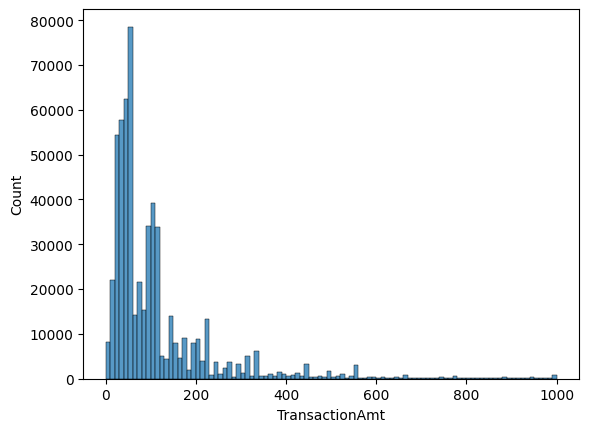

In [36]:
sns.histplot(train_transaction.loc[train_transaction['TransactionAmt'] <= 1000], x='TransactionAmt', bins=100)

<Axes: xlabel='TransactionAmt', ylabel='Count'>

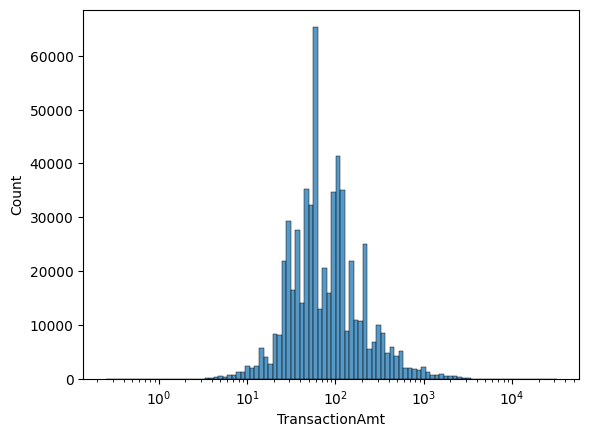

In [ ]:
sns.histplot(train_transaction, x='TransactionAmt', bins=100, log_scale=True)

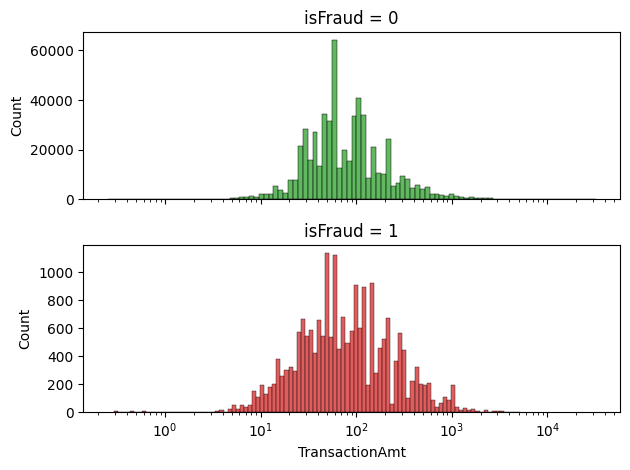

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.set_title('isFraud = 0')
ax2.set_title('isFraud = 1')

sns.histplot(train_transaction.loc[train_transaction['isFraud'] == 0], x='TransactionAmt', color='tab:green', bins=100, log_scale=True, ax=ax1)
sns.histplot(train_transaction.loc[train_transaction['isFraud'] == 1], x='TransactionAmt', color='tab:red', bins=100, log_scale=True, ax=ax2)

plt.tight_layout()
plt.show()

In [24]:
print(f"Mean transaction amount for Non-Fraud is {np.mean(train_transaction.loc[train_transaction['isFraud'] == 0]['TransactionAmt']).round(2)}")
print(f"Mean transaction amount for Fraud is {np.mean(train_transaction.loc[train_transaction['isFraud'] == 1]['TransactionAmt']).round(2)}")

Mean transaction amount for Non-Fraud is 134.51
Mean transaction amount for Fraud is 149.24


#### Card Issuer

In [ ]:
train_transaction['card4'].value_counts(dropna=False)

card4
visa                384767
mastercard          189217
american express      8328
discover              6651
NaN                   1577
Name: count, dtype: int64

In [93]:
pct_card_fraud = train_transaction.groupby(['card4', 'isFraud'])['TransactionAmt'].sum() / train_transaction.groupby(['card4'])['TransactionAmt'].sum()
pct_card_fraud = (pct_card_fraud * 100).unstack(level=0).reset_index(drop=True)

pct_card_fraud

card4,american express,discover,mastercard,visa
0,97.030419,89.702981,96.583877,96.100993
1,2.969581,10.297019,3.416123,3.899007


#### Credit/Debit

In [29]:
train_transaction['card6'].value_counts(dropna=False)

card6
debit              439938
credit             148986
NaN                  1571
debit or credit        30
charge card            15
Name: count, dtype: int64

#### DeviceType

In [32]:
train_identity['DeviceInfo'].unique()

array(['SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows', ...,
       'LDN-LX3 Build/HUAWEILDN-LX3', 'Z955A', 'LG-E975'], dtype=object)

In [33]:
train_identity['DeviceType'].value_counts(dropna=False)

DeviceType
desktop    85165
mobile     55645
NaN         3423
Name: count, dtype: int64

#### E-mail Domain

In [95]:
train_transaction['R_emaildomain'].value_counts(dropna=False)

R_emaildomain
NaN                453249
gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
                    ...  
frontiernet.net        14
netzero.com            14
centurylink.net        12
netzero.net             9
sc.rr.com               8
Name: count, Length: 61, dtype: int64

In [118]:
pct_email_fraud = train_transaction.groupby(['R_emaildomain', 'isFraud'])['TransactionAmt'].sum() / train_transaction.groupby(['R_emaildomain'])['TransactionAmt'].sum()
pct_email_fraud = (pct_email_fraud * 100).unstack('isFraud').dropna()

pct_email_fraud.sort_values(by=1, ascending=False).head(10)

isFraud,0,1
R_emaildomain,,
protonmail.com,2.402264,97.597736
mail.com,48.574506,51.425494
netzero.net,55.645161,44.354839
icloud.com,78.613555,21.386445
outlook.com,80.013195,19.986805
outlook.es,84.345394,15.654606
gmail.com,84.677812,15.322188
earthlink.net,85.056705,14.943295
live.com.mx,90.093109,9.906891


#### Missing data